In [1]:
import matplotlib.pyplot as plt
import pandas
from pydarn import*
import pydarn

resetting environment variable IGRF_COEFFS in python script
resetting environment variable AACGM_v2_DAT_PREFIX in python script
non-default coefficient files may be specified by running aacgmv2.wrapper.set_coeff_path before any other functions



IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


In [2]:
import cartopy as ccrs

In [3]:
import datetime as dt

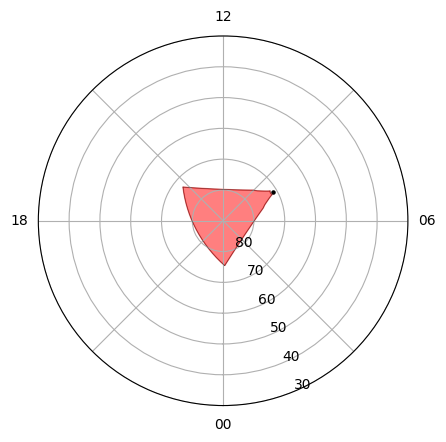

In [4]:
_ , _, ax, ccrs = pydarn.Fan.plot_fov(stid=65,
                                      date=dt.datetime(2022, 1, 8, 14, 5),
                                      fov_color='red',
                                      coords=pydarn.Coords.AACGM_MLT,
                                      projs=pydarn.Projs.POLAR)
#ax.coastlines()
plt.show()

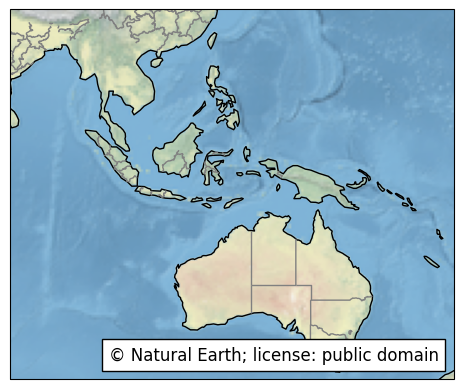

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')

    # Add a text annotation for the license information to the
    # the bottom right corner.
    text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 12}, frameon=True)
    ax.add_artist(text)

    plt.show()


if __name__ == '__main__':
    main()

In [13]:
fitacf_file = "/Users/subodhdahal/desktop/pydarn/local-data/20221116.0000.29.sas.a.fitacf"
sdarn_read = pydarn.SuperDARNRead(fitacf_file)
fitacf_data = sdarn_read.read_fitacf()


In [14]:
fitacf_data[15]

OrderedDict([('radar.revision.major', 0),
             ('radar.revision.minor', 6),
             ('origin.code', 1),
             ('origin.time', 'Wed Nov 16 08:08:43 2022'),
             ('origin.command',
              '/home/dtg558/projects/rpp-kam136/rst/bin/make_fit /home/dtg558/scratch/tmp_fitacf/2022/11//raw/20221116.0000.29.sas.a.rawacf'),
             ('cp', 151),
             ('stid', 5),
             ('time.yr', 2022),
             ('time.mo', 11),
             ('time.dy', 16),
             ('time.hr', 0),
             ('time.mt', 1),
             ('time.sc', 26),
             ('time.us', 26215),
             ('txpow', -1),
             ('nave', 37),
             ('atten', 0),
             ('lagfr', 1200),
             ('smsep', 300),
             ('ercod', 0),
             ('stat.agc', 8),
             ('stat.lopwr', 8),
             ('noise.search', 0.0),
             ('noise.mean', 0.0),
             ('channel', 0),
             ('bmnum', 7),
             ('bmazm', -1.620

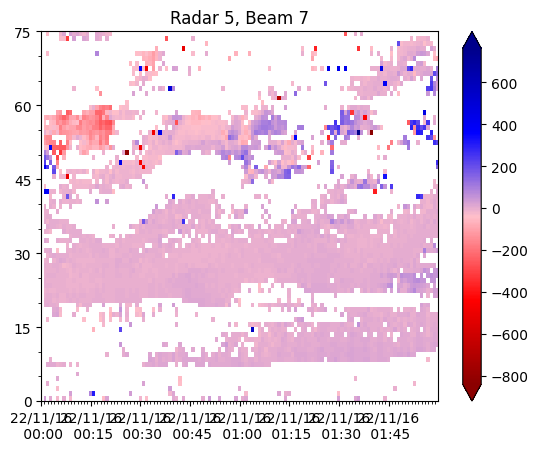

In [15]:
pydarn.RTP.plot_range_time(fitacf_data, beam_num=fitacf_data[15]['bmnum'], range_estimation=pydarn.RangeEstimation.RANGE_GATE)
plt.title("Radar {:d}, Beam {:d}".format(fitacf_data[15]['stid'], fitacf_data[15]['bmnum']))

plt.show()

(<matplotlib.collections.QuadMesh at 0x16d316bc0>,
 [datetime.datetime(2022, 11, 16, 0, 0, 55, 694834),
  datetime.datetime(2022, 11, 16, 0, 1, 26, 26215),
  datetime.datetime(2022, 11, 16, 0, 2, 26, 24118),
  datetime.datetime(2022, 11, 16, 0, 3, 26, 24608),
  datetime.datetime(2022, 11, 16, 0, 4, 26, 25894),
  datetime.datetime(2022, 11, 16, 0, 5, 26, 23996),
  datetime.datetime(2022, 11, 16, 0, 6, 26, 23491),
  datetime.datetime(2022, 11, 16, 0, 7, 26, 24776),
  datetime.datetime(2022, 11, 16, 0, 8, 26, 24073),
  datetime.datetime(2022, 11, 16, 0, 9, 26, 23966),
  datetime.datetime(2022, 11, 16, 0, 10, 26, 22267),
  datetime.datetime(2022, 11, 16, 0, 11, 26, 23951),
  datetime.datetime(2022, 11, 16, 0, 12, 26, 24640),
  datetime.datetime(2022, 11, 16, 0, 13, 26, 21548),
  datetime.datetime(2022, 11, 16, 0, 14, 26, 24625),
  datetime.datetime(2022, 11, 16, 0, 15, 26, 24717),
  datetime.datetime(2022, 11, 16, 0, 16, 26, 27197),
  datetime.datetime(2022, 11, 16, 0, 17, 26, 26891),
  da

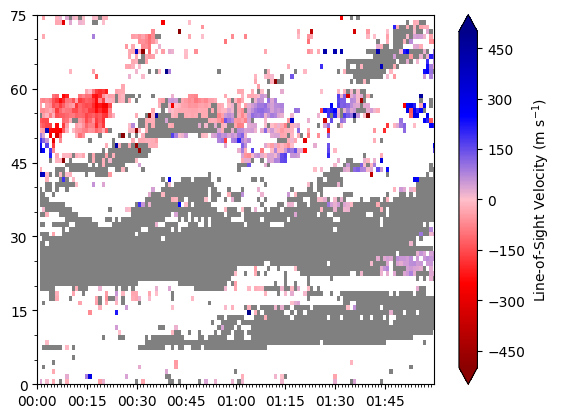

In [16]:
pydarn.RTP.plot_range_time(fitacf_data, beam_num=fitacf_data[15]['bmnum'], groundscatter=True,
                           zmax=500, zmin=-500, date_fmt='%H:%M',
                           colorbar_label='Line-of-Sight Velocity (m s$^{-1}$)',
                           range_estimation=pydarn.RangeEstimation.RANGE_GATE)

In [17]:
radar_info = pydarn.SuperDARNRadars.radars[32]
print(radar_info)

_Radar(name='Wallops Island', institution='JHU Applied Physics Laboratory', hemisphere=<Hemisphere.North: 1>, range_gate_45=100, hardware_info=_HdwInfo(stid=32, status=<Status.online: 1>, abbrev='wal', date=datetime.datetime(2006, 3, 13, 19, 38), geographic=_Coord(lat=37.93, lon=-75.47, alt=50.0), boresight=_Boresight(physical=35.9, electronic=0.0), beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=_Tdiff(channel_a=0.0, channel_b=0.0), phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=100.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0, gates=110, beams=24))


/Users/subodhdahal/Desktop/pydarn/.venv/lib/python3.10/site-packages/pydarn/plotting/rtp.py: 924: UserWarning: WARNING: matplotlib Default dpi may cause distortion in range gates and time period. The figure size can be adjusted with the option figsize and dpi can be adjusted when saving the file.


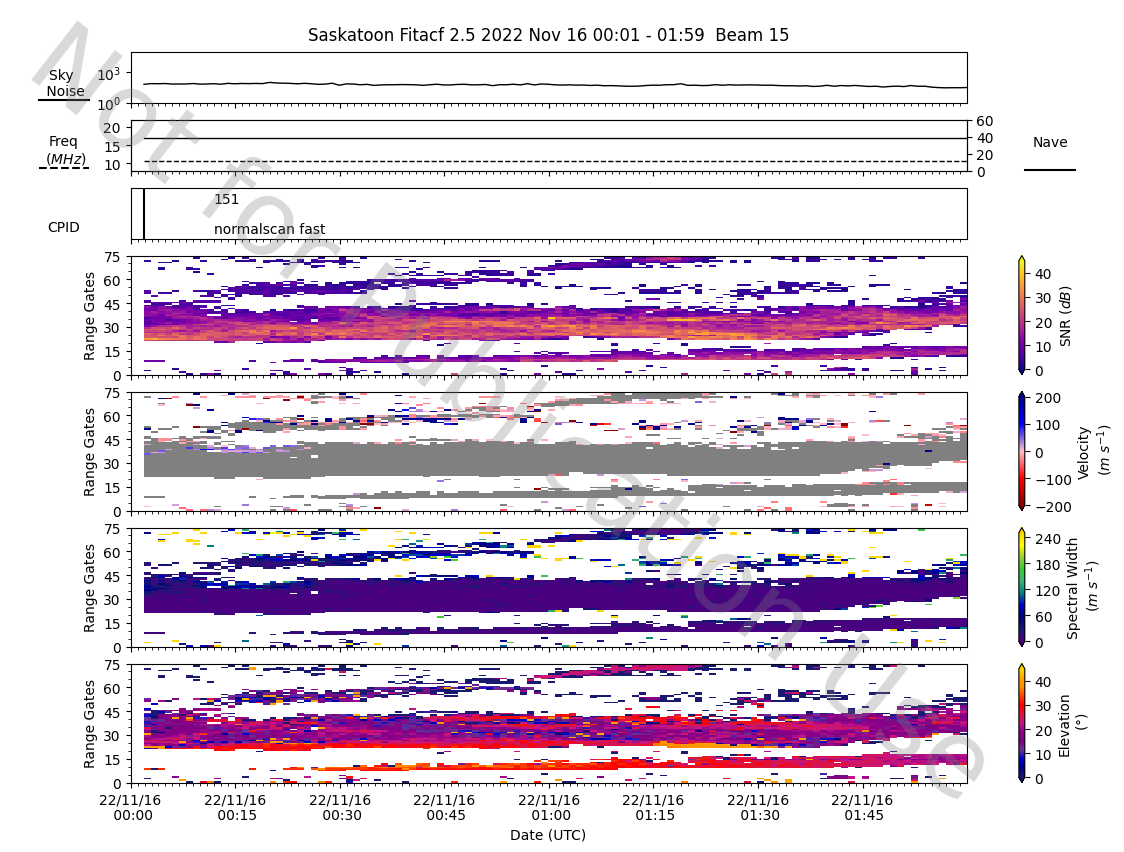

In [18]:
pydarn.RTP.plot_summary(fitacf_data, beam_num=15,
                        range_estimation=pydarn.RangeEstimation.RANGE_GATE)
plt.show()

In [19]:
fitacf_data[1900]['tfreq']

10500

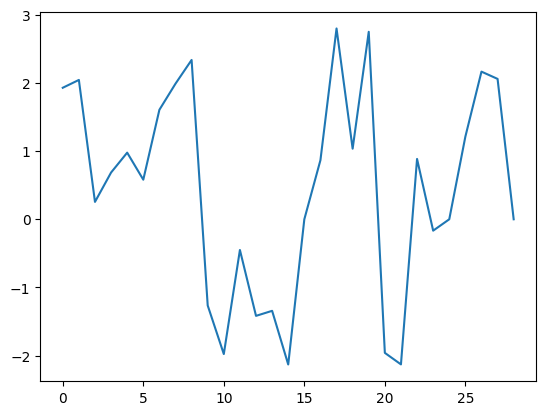

In [20]:
x=fitacf_data[19]['phi0']
y=fitacf_data[19]['w_l']
plt.plot(x)



In [ ]:
file = "20221116.sas.grd"
SDarn_read = pydarn.SuperDARNRead(file)
grid_data = SDarn_read.read_grid()

In [22]:
file = "/Users/subodhdahal/desktop/pydarn/local-data/20221116.map"
SDarn_read = pydarn.SuperDARNRead(file)
map1 = SDarn_read.read_map()
map1[1]

OrderedDict([('start.year', 2022),
             ('start.month', 11),
             ('start.day', 16),
             ('start.hour', 0),
             ('start.minute', 3),
             ('start.second', 0.0),
             ('end.year', 2022),
             ('end.month', 11),
             ('end.day', 16),
             ('end.hour', 0),
             ('end.minute', 5),
             ('end.second', 0.0),
             ('map.major.revision', 1),
             ('map.minor.revision', 13),
             ('source', 'map_fit'),
             ('doping.level', 1),
             ('model.wt', 1),
             ('error.wt', 1),
             ('IMF.flag', 9),
             ('IMF.delay', 30),
             ('IMF.Bx', 0.0),
             ('IMF.By', 0.0),
             ('IMF.Bz', 0.0),
             ('IMF.Vx', 0.0),
             ('IMF.tilt', -21.97429847717285),
             ('IMF.Kp', 0.0),
             ('model.angle', 'Bang     0 deg.'),
             ('model.level', 'Esw    0.6 mV/m'),
             ('model.tilt', 'tilt -20.

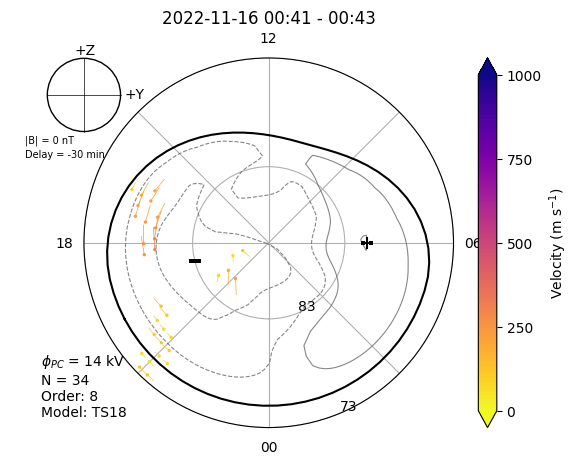

In [ ]:
mapplot = pydarn.Maps.plot_mapdata(map1,lowlat=73, record=20)
plt.show()

(array([76.5, 77.5, 78.5, 77.5, 78.5, 77.5, 78.5, 79.5, 79.5, 79.5, 86.5,
        87.5, 78.5, 79.5, 84.5, 85.5, 85.5, 78.5, 78.5, 78.5, 77.5, 77.5,
        77.5, 76.5, 76.5, 76.5, 74.5, 74.5, 75.5, 75.5, 73.5, 73.5, 71.5,
        69.5], dtype=float32),
 array([10.62376891, 10.63815318, 10.56766889, 10.71870688, 10.65493535,
        10.79926057, 10.82946828, 10.76996847, 10.86516795, 10.96036797,
        11.34116699, 11.28761721, 11.0040012 , 11.05556799,  5.29054123,
         5.31298117,  5.53738067, 11.09126767,  5.24441467,  5.33168113,
         5.32161193,  5.40216559,  5.48271925,  5.38778101,  5.46258083,
         5.53738067,  5.42985591,  5.49530575,  5.51494071,  5.58475388,
         5.47798079,  5.53958064,  5.50391758,  5.52491401]),
 array([103.96246052, 193.34546625, 205.1322785 , 208.22667521,
        214.69336537, 218.87375423, 239.33192438, 218.66571572,
        242.54902604, 273.98757368,  81.02476121, 117.48858086,
        257.48320637, 305.27795226,  93.29948155, 188.0

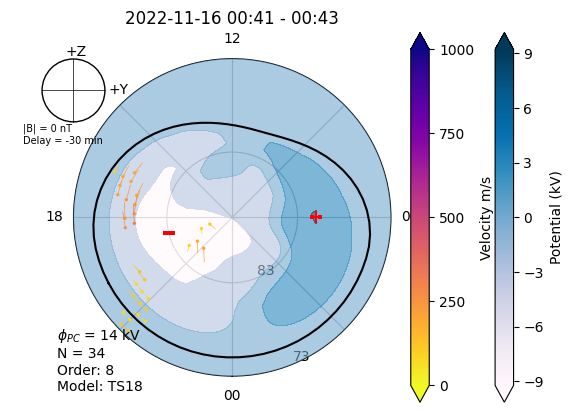

In [23]:
import matplotlib.pyplot as plt 
import pydarn

map_file = "/Users/subodhdahal/desktop/pydarn/local-data/20221116.north.map"
map_data = pydarn.SuperDARNRead().read_dmap(map_file)

pydarn.Maps.plot_mapdata(map_data, record=20, 
                         parameter=pydarn.MapParams.FITTED_VELOCITY,
                         lowlat=73, colorbar_label='Velocity m/s',
                         contour_fill = True,
                         contour_fill_cmap= 'PuBu',
                         contour_colorbar = True,
                         contour_colorbar_label='Potential (kV)',
                         pot_minmax_color = 'r',
                         map_info=True, imf_dial=True, hmb=True)

/Users/subodhdahal/Desktop/pydarn/.venv/lib/python3.10/site-packages/pydarn/plotting/rtp.py: 731: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.


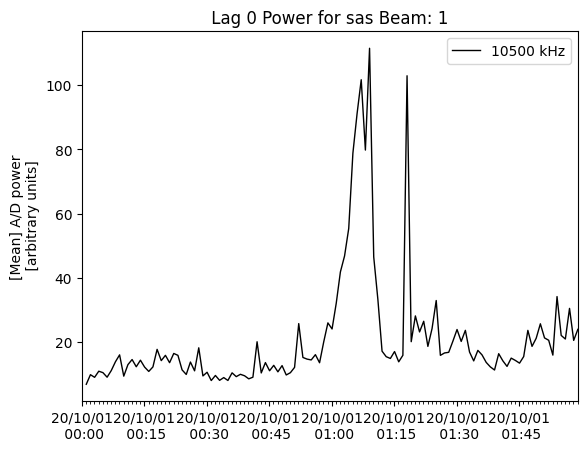

In [24]:
file = "/Users/subodhdahal/desktop/pydarn/local-data/20201001.0001.00.sas.a.rawacf"
sdarn_read = pydarn.SuperDARNRead(file)
rawacf_data = sdarn_read.read_rawacf()

pydarn.Power.plot_pwr0_statistic(rawacf_data,beam_num=1)
plt.show()

/Users/subodhdahal/Desktop/pydarn/.venv/lib/python3.10/site-packages/pydarn/plotting/rtp.py: 731: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.


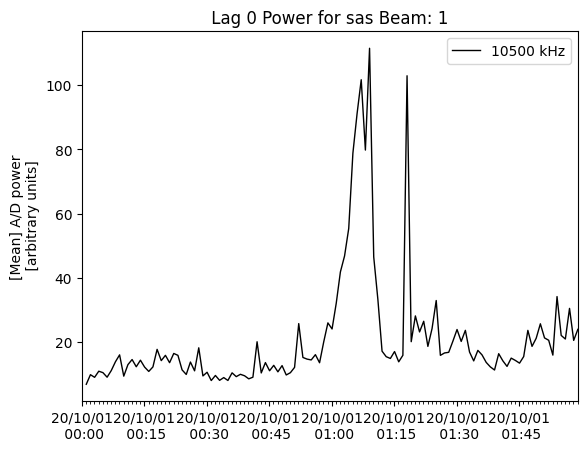

In [26]:
file = "/Users/subodhdahal/desktop/pydarn/local-data/20201001.0001.00.sas.a.rawacf"
sdarn_read = pydarn.SuperDARNRead(file)
rawacf_data = sdarn_read.read_rawacf()

pydarn.Power.plot_pwr0_statistic(rawacf_data,beam_num=1)
plt.show()